In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')

In [3]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
df.shape

(700, 11)

# Preprocessing

✔ Check Null Values in Datset

In [5]:
df.isna().mean() 

User ID                       0.0
Device Model                  0.0
Operating System              0.0
App Usage Time (min/day)      0.0
Screen On Time (hours/day)    0.0
Battery Drain (mAh/day)       0.0
Number of Apps Installed      0.0
Data Usage (MB/day)           0.0
Age                           0.0
Gender                        0.0
User Behavior Class           0.0
dtype: float64

✔ Check Duplicated Values in Datset

In [6]:
df.duplicated().mean()

0.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [8]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [9]:
df.drop(columns=['User ID'], axis=1, inplace=True)

# EDA

In [10]:
df['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

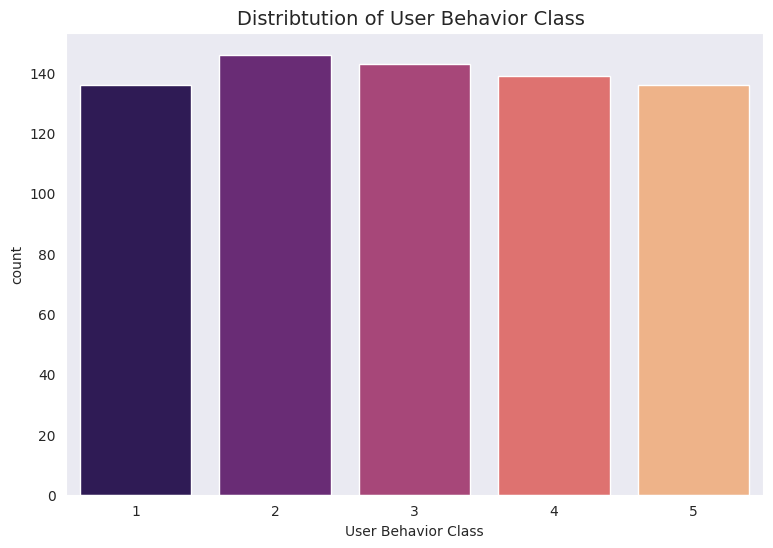

In [11]:
sns.set_style(style='dark')
plt.figure(figsize=(9,6))
plt.title('Distribtution of User Behavior Class ', fontsize=14)
sns.countplot(x=df['User Behavior Class'], palette='magma')
plt.show()

In [12]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

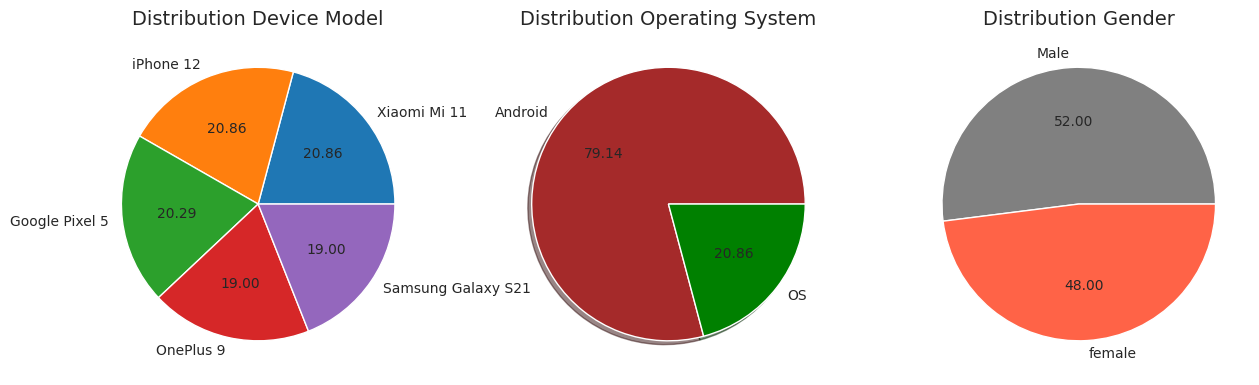

In [13]:
plt.figure(figsize=(15,12))
plt.subplot(1,3,1)
plt.title('Distribution Device Model', fontsize=14)
plt.pie(x=df['Device Model'].value_counts(), autopct='%.2f', labels=['Xiaomi Mi 11', 'iPhone 12', 'Google Pixel 5', 'OnePlus 9', 'Samsung Galaxy S21'])


plt.subplot(1,3,2)
plt.title('Distribution Operating System', fontsize=14)
plt.pie(x=df['Operating System'].value_counts(), autopct='%.2f', colors=['brown', 'green'], shadow=True, labels=['Android', 'OS'])

plt.subplot(1,3,3)
plt.title('Distribution Gender', fontsize=14)
plt.pie(x=df['Gender'].value_counts(), autopct='%.2f', colors=['gray', 'tomato'], labels=['Male', 'female'])
plt.show()


In [14]:
df['Gender'].value_counts()

Gender
Male      364
Female    336
Name: count, dtype: int64

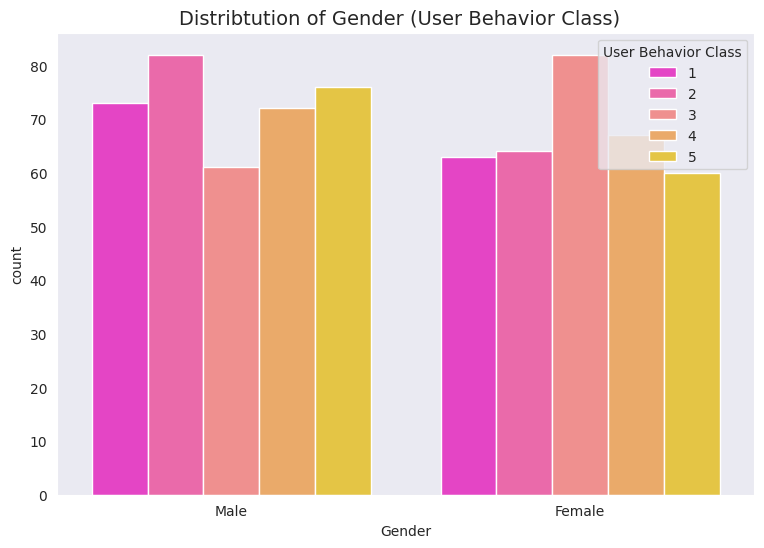

In [15]:
plt.figure(figsize=(9,6))
plt.title('Distribtution of Gender (User Behavior Class)  ', fontsize=14)
sns.countplot(x=df['Gender'], palette='spring', hue=df['User Behavior Class'])
plt.show()

In [16]:
df['Operating System'].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

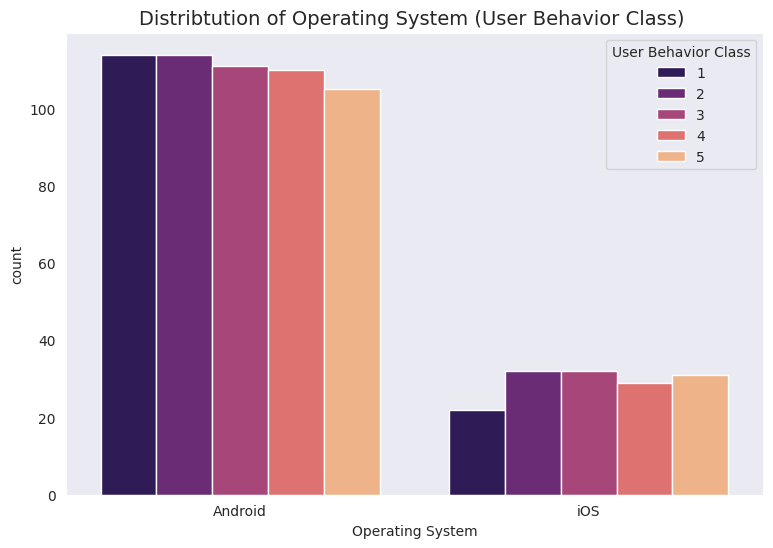

In [17]:
plt.figure(figsize=(9,6))
plt.title('Distribtution of Operating System (User Behavior Class) ', fontsize=14)
sns.countplot(x=df['Operating System'], palette='magma', hue=df['User Behavior Class'])
plt.show()

In [18]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

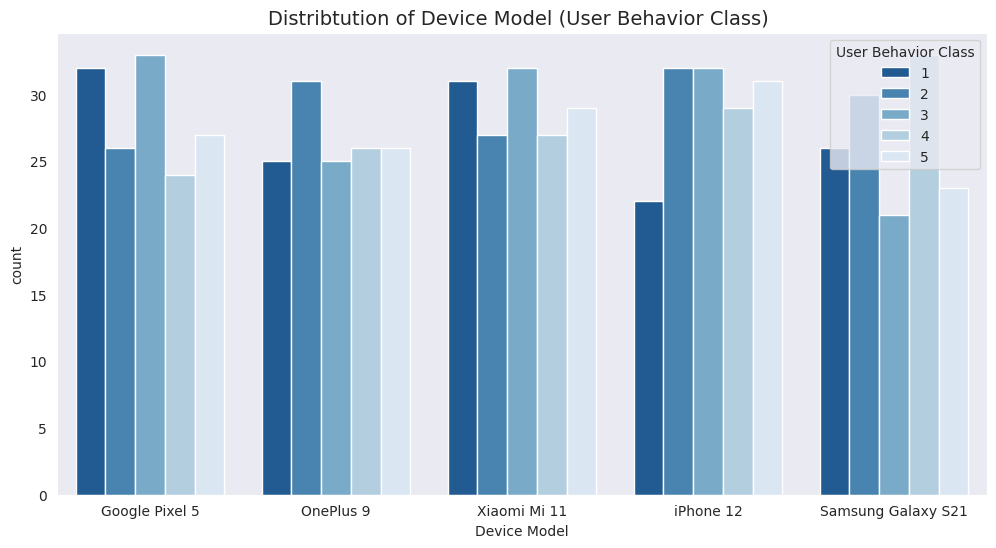

In [19]:
plt.figure(figsize=(12,6))
plt.title('Distribtution of Device Model (User Behavior Class) ', fontsize=14)
sns.countplot(x=df['Device Model'], palette='Blues_r', hue=df['User Behavior Class'])
plt.show()

In [20]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


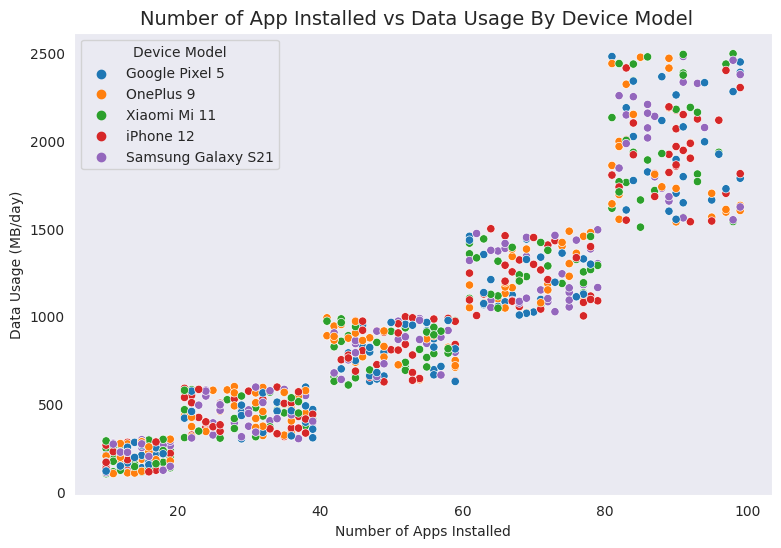

In [21]:
plt.figure(figsize=(9,6))
plt.title('Number of App Installed vs Data Usage By Device Model  ', fontsize=14)
sns.scatterplot(x=df['Number of Apps Installed'], y=df['Data Usage (MB/day)'], hue=df['Device Model'])
plt.show()

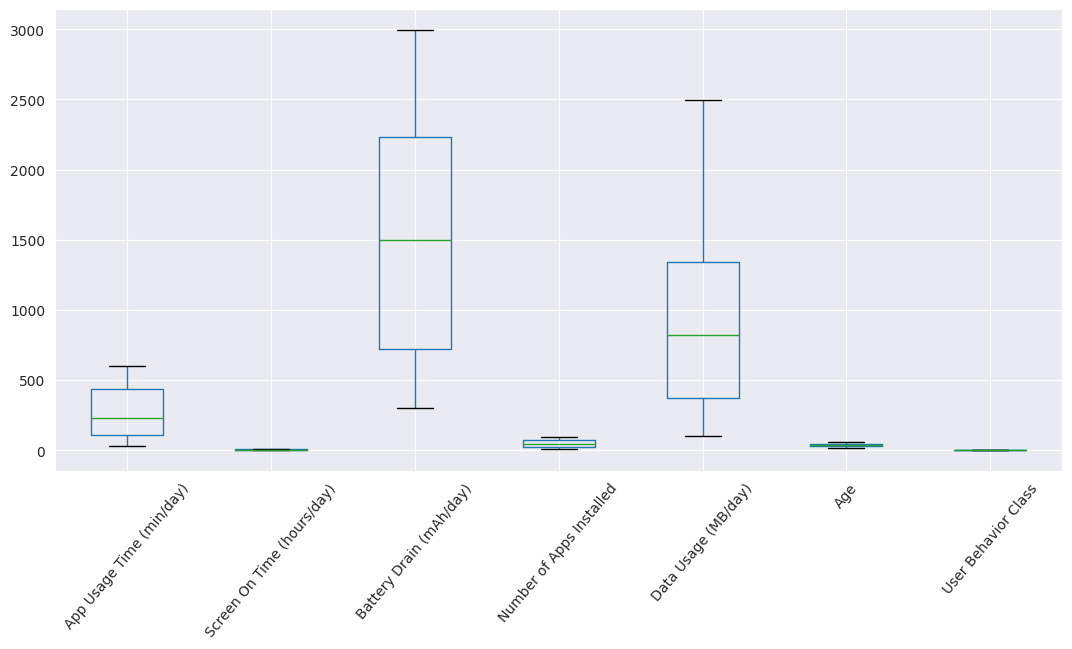

In [22]:
plt.figure(figsize=(13,6))
df.boxplot()
plt.xticks(rotation=50)
plt.show()

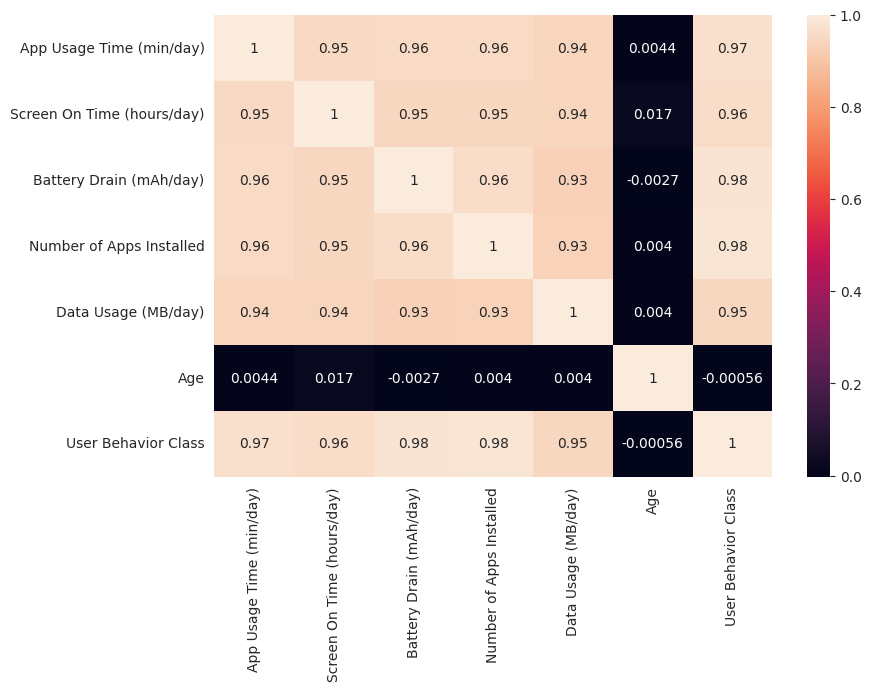

In [23]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(9,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

# Label Encoding

✔Categorical convert To Numerical Number

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col] = le.fit_transform(df[col])
    

In [25]:
df.corr()['User Behavior Class']

Device Model                  0.037970
Operating System              0.041326
App Usage Time (min/day)      0.970498
Screen On Time (hours/day)    0.964581
Battery Drain (mAh/day)       0.978587
Number of Apps Installed      0.981255
Data Usage (MB/day)           0.946734
Age                          -0.000563
Gender                       -0.000735
User Behavior Class           1.000000
Name: User Behavior Class, dtype: float64

Train test Split 

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['User Behavior Class']), 
                                                           df['User Behavior Class'], test_size=0.2)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(560, 9)
(560,)
(140, 9)
(140,)


# Model Buliding

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, recall_score, f1_score

K_Nearest Neighbors Classifier

# 100 Accuracy

In [29]:
nn = KNeighborsClassifier()
nn.fit(X_train, y_train)
y_pred1 = nn.predict(X_test)
accuracy_score(y_test, y_pred1)

1.0

In [30]:
print(y_pred1[2:5])
print(y_test[2:5])

[5 3 4]
185    5
593    3
560    4
Name: User Behavior Class, dtype: int64


Random Forest Classifier

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
accuracy_score(y_test, y_pred2)

1.0

In [32]:
print(y_pred2[:5])
print(y_test[:5])

[1 5 5 3 4]
171    1
46     5
185    5
593    3
560    4
Name: User Behavior Class, dtype: int64


Adaboost Classifier

In [33]:
abc = AdaBoostClassifier(algorithm='SAMME', n_estimators=10)
abc.fit(X_train, y_train)
y_pred3 = abc.predict(X_test)
accuracy_score(y_test, y_pred3)

1.0

In [34]:
print(y_pred2[:5])
print(y_test[:5])

[1 5 5 3 4]
171    1
46     5
185    5
593    3
560    4
Name: User Behavior Class, dtype: int64


Classification Reports

In [35]:
knn_report = classification_report(y_test,y_pred1)
randomforest_report = classification_report(y_test,y_pred2)
Adaboost_report = classification_report(y_test,y_pred3)

print('\n KNN\n', knn_report)
print()
print('\n Random Forest Classifier\n', randomforest_report)
print()
print('\n AdaBoost Classifier\n', Adaboost_report)


 KNN
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        30

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



 Random Forest Classifier
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        30

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.

In [36]:
result=pd.DataFrame({'Classification Algorithms':['KNN','Random Forest Classifier','AdaBoost Classifier'],
                  ' Test Accuracy':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3)],
                  ' Test Precision':[precision_score(y_test,y_pred1, average='macro'),precision_score(y_test,y_pred2,average='macro'),precision_score(y_test,y_pred3,average='macro')],
                  ' Test Recall':[recall_score(y_test,y_pred1,average='macro'),recall_score(y_test,y_pred2,average='macro'),recall_score(y_test,y_pred3,average='macro')],
                  'Test F1 Score':[f1_score(y_test,y_pred1,average='macro'),f1_score(y_test,y_pred2,average='macro'),f1_score(y_test,y_pred3,average='macro')]})
result

,Classification Algorithms,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,KNN,1.0,1.0,1.0,1.0
1,Random Forest Classifier,1.0,1.0,1.0,1.0
2,AdaBoost Classifier,1.0,1.0,1.0,1.0


KNN Confution Metrics  Show in Graph

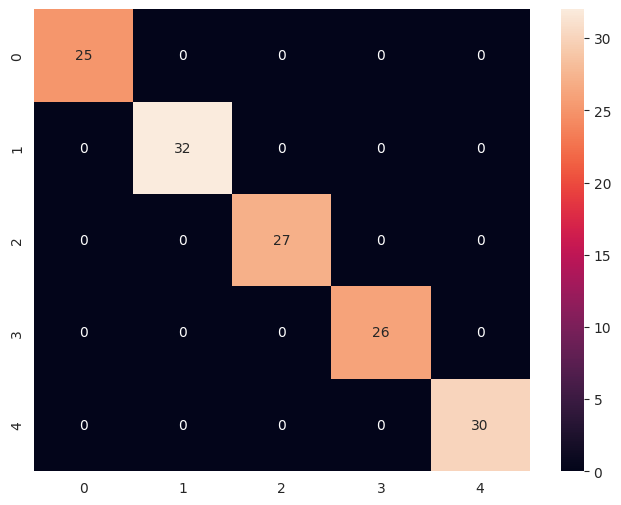

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)
plt.show()

Random Forest Classifier Confution metrics Show in Graph

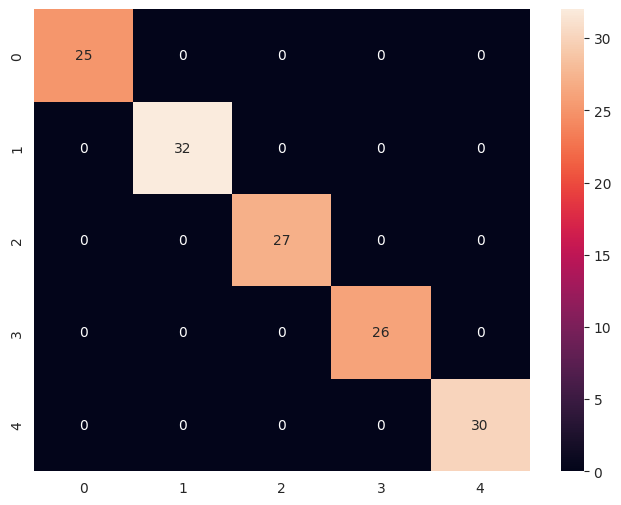

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.show()

Adaboost Classifier Confution metrics Show in graph

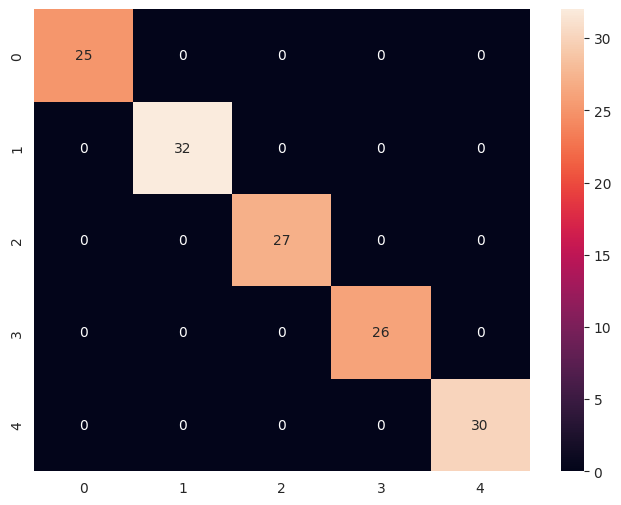

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True)
plt.show()

Please Upvoted!!